In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cpu


In [11]:
df = mb.bindome.datasets.PBM.gcn4_dream_v11()
df = df.sort_values('intensity', ascending=False).reset_index(drop=True)

df = df[['seq', 'intensity']]
df.columns = ['seq', 0]


In [12]:
data = df.copy() # head(10000)
# data = df.sample(n=10000)

In [14]:
data[1] = data[0]
data[0] = np.median(data[1])

data[0] = np.log(data[0])
data[1] = np.log(data[1])

In [16]:
data['seq'] = data['seq'].str[:-23]

In [17]:
data

,seq,0,1
0,CGCTGATAATGAGTCACACCTTGCCTTCCAGACAAAG,9.91054,12.987958
1,TCCTGTGACTCATCCATACTCGAACATCCTTATGGAG,9.91054,12.923009
2,CTAGTATGATGCTAACAGCATGATGACTCATACCGAG,9.91054,12.875613
3,TTGCGTGGTCGTCGTATTGTATGACTCATGAATTTAG,9.91054,12.841665
4,TGTGAGTGACTCATAGTAGATTGATTTGAAGGTTAAG,9.91054,12.794970
...,...,...,...
41899,CCGGGCTAAGAAAGGATGGAGCGCTAGTCCGGGTGCG,9.91054,8.649847
41900,AGAGCCATCAAGCTCCTATCTAGGACGGCCGAGCGCG,9.91054,8.528761
41901,GATGCAAGATAAAATAGATTCGGAGCTTCTAGAATGG,9.91054,8.441336
41902,CACGCCATCGTTATGAGCCTCCGGAGCGTTTAGAACG,9.91054,7.816431


In [18]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [19]:
print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=1, enr_series=True)
train = tdata.DataLoader(dataset=dataset, batch_size=10000, shuffle=True)

loading object (# entries) 41904


In [26]:
# train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [94]:
train.dataset.n_batches

1

In [86]:
# train.dataset.rounds

# rounds 1
# batches 1
# enr_series True
next w 14
kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
mono grad 1 None
di grad 1 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[0., 0.]], requires_grad=True)
activities
[[[1. 1.]
  [1. 1.]]]


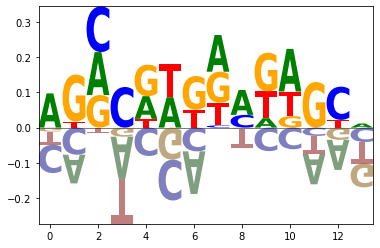

optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'>
Epoch:  1, Loss: 94.8691 , best epoch: -1 secs per epoch: 0.672 s
Epoch: 11, Loss: 88.2522 , best epoch: 9 secs per epoch: 0.758 s
Epoch: 21, Loss: 58.8216 , best epoch: 19 secs per epoch: 0.722 s
Epoch: 31, Loss: 4.0391 , best epoch: 29 secs per epoch: 0.712 s
Epoch: 41, Loss: 0.1119 , best epoch: 37 secs per epoch: 0.706 s
Epoch: 51, Loss: 0.1001 , best epoch: 49 secs per epoch: 0.700 s
Epoch: 61, Loss: 0.0997 , best epoch: 49 secs per epoch: 0.697 s
Epoch: 65, Loss: 0.0999 , best epoch: 49 secs per epoch: 0.698 s
early stop!
after kernel opt / before shift optim.
log_etas
Parameter containing:
tensor([[ 2.3878, -2.3878]], requires_grad=True)
activities
[[[0.9999997  0.15145127]
  [1.         1.        ]]]


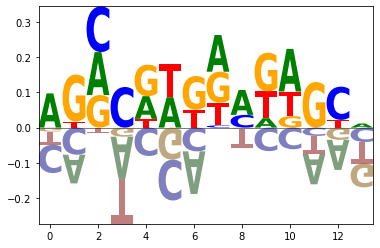

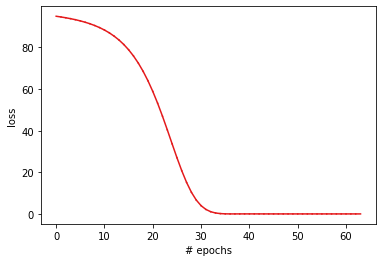

after shift optimz model
log_etas
Parameter containing:
tensor([[ 2.3878, -2.3878]], requires_grad=True)
activities
[[[0.9999997  0.15145127]
  [1.         1.        ]]]


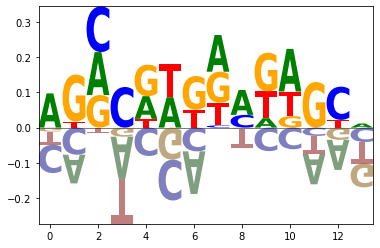

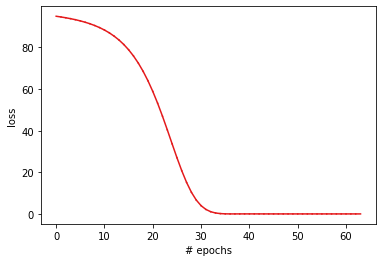


kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
mono grad 1 None
di grad 1 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[ 2.3878, -2.3878]], requires_grad=True)
activities
[[[0.9999997  0.15145127]
  [1.         1.        ]]]


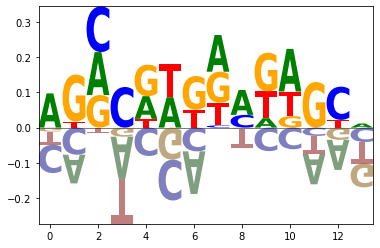

optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'>
Epoch:  1, Loss: 0.1400 , best epoch: -1 secs per epoch: 1.092 s
Epoch: 11, Loss: 0.0553 , best epoch: 9 secs per epoch: 1.068 s
Epoch: 21, Loss: 0.0539 , best epoch: 19 secs per epoch: 1.009 s
Epoch: 31, Loss: 0.0534 , best epoch: 25 secs per epoch: 0.994 s
Epoch: 41, Loss: 0.0527 , best epoch: 37 secs per epoch: 0.979 s
Epoch: 51, Loss: 0.0516 , best epoch: 49 secs per epoch: 0.973 s
Epoch: 61, Loss: 0.0519 , best epoch: 56 secs per epoch: 0.970 s
Epoch: 71, Loss: 0.0502 , best epoch: 66 secs per epoch: 0.968 s
Epoch: 81, Loss: 0.0495 , best epoch: 76 secs per epoch: 0.965 s
Epoch: 91, Loss: 0.0480 , best epoch: 88 secs per epoch: 0.966 s
after kernel opt / before shift optim.
log_etas
Parameter containing:
tensor([[ 2.3790, -2.3790]], requires_grad=True)
activities
[[[0.9999997  0.15145127]
  [0.99998015 0.98864913]]]


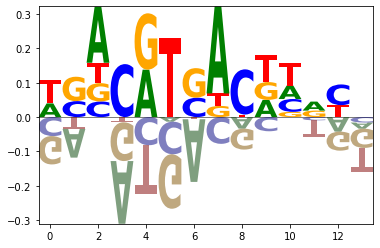

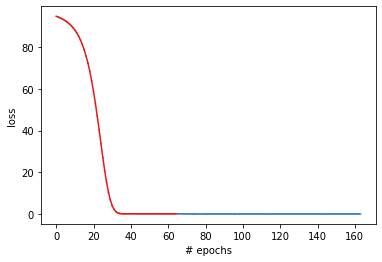


optimize_motif_shift (first)...left
mono grad 1 None
di grad 1 None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'>
Epoch:  1, Loss: 0.0491 , best epoch: -1 secs per epoch: 0.916 s
Epoch: 11, Loss: 0.0497 , best epoch: 5 secs per epoch: 1.055 s
Epoch: 21, Loss: 0.0490 , best epoch: 5 secs per epoch: 1.015 s
Epoch: 21, Loss: 0.0490 , best epoch: 5 secs per epoch: 1.015 s
early stop!

right
mono grad 1 None
di grad 1 None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'>
Epoch:  1, Loss: 0.0850 , best epoch: -1 secs per epoch: 0.927 s
Epoch: 11, Loss: 0.0849 , best epoch: 6 secs per epoch: 1.042 s
Epoch: 21, Loss: 0.0854 , best epoch: 15 secs per epoch: 1.002 s
Epoch: 31, Loss: 0.0850 , best epoch: 22 secs per epoch: 0.986 s
Epoch: 38, Loss: 0.0850 , best epoch: 22 secs per epoch: 0.981 s
early stop!
curr=0.0464 left=0.0489 right=0.0842
action: curr position

after shift optimz model
log_etas
Parameter conta

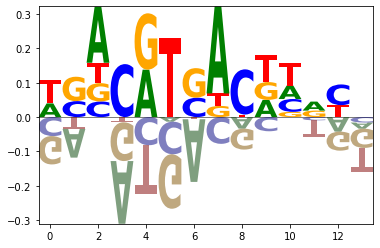

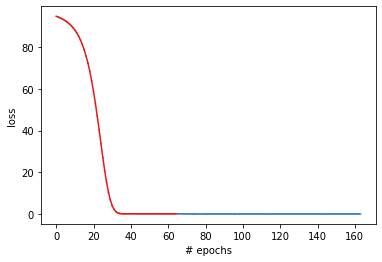

In [25]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

model_by_k_next, res_next = mb.tl.train_iterative(train, device, min_w=14, max_w=15, n_kernels=2, criterion=mb.tl.MSELoss())
# res = []
# model_by_k = {}
